In [1]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [14]:
all_data = []
import json
with open("/home/jovyan/output-cardiology/pubmed/data.jsonl") as f:
    for line in f:
        data = json.loads(line)
        all_data.append(data)
        

In [5]:
lengths = []
import json
with open("/home/jovyan/output-cardiology/pubmed/data.jsonl") as f:
    for line in f:
        data = json.loads(line)
        lengths.append(len(data['text']))

In [8]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 118.6 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.7/299.7 kB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 88.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 104.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 19.1 MB/s eta 0:00:00


<Axes: >

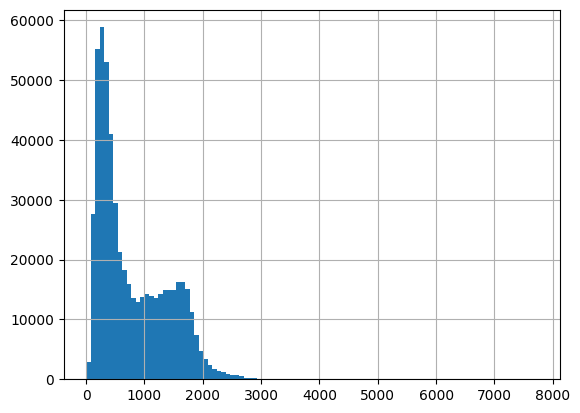

In [12]:
import pandas as pd

pd.DataFrame(dict(lengths=lengths))['lengths'].hist(bins=100)

(array([6.7100e+02, 6.2800e+02, 1.2250e+03, 2.8130e+03, 6.5110e+03,
        1.1473e+04, 1.5322e+04, 1.6913e+04, 1.7618e+04, 1.6941e+04,
        1.8334e+04, 1.8113e+04, 1.7955e+04, 1.6740e+04, 1.7093e+04,
        1.5481e+04, 1.4649e+04, 1.3132e+04, 1.1468e+04, 1.0811e+04,
        9.5750e+03, 8.4660e+03, 7.9470e+03, 6.7600e+03, 6.6220e+03,
        6.0410e+03, 5.8390e+03, 5.4240e+03, 5.6610e+03, 5.4050e+03,
        5.0390e+03, 4.7390e+03, 4.3310e+03, 4.2550e+03, 4.1010e+03,
        4.0270e+03, 4.0190e+03, 3.8190e+03, 4.0320e+03, 4.2330e+03,
        4.3130e+03, 4.0960e+03, 4.2560e+03, 4.4730e+03, 4.3100e+03,
        4.4350e+03, 4.1580e+03, 4.3330e+03, 4.2640e+03, 4.2290e+03,
        4.2070e+03, 4.0410e+03, 4.3200e+03, 4.2980e+03, 4.4020e+03,
        4.4580e+03, 4.5900e+03, 4.6930e+03, 4.5500e+03, 4.6840e+03,
        4.4040e+03, 4.7460e+03, 4.5550e+03, 4.7110e+03, 4.4720e+03,
        4.8730e+03, 5.0450e+03, 5.1580e+03, 5.0520e+03, 4.8200e+03,
        5.1120e+03, 5.0160e+03, 4.9740e+03, 4.61

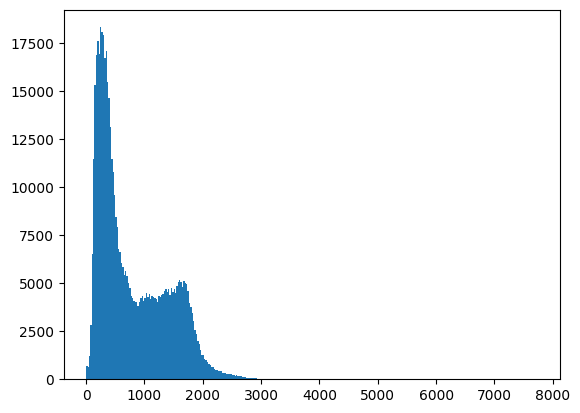

In [ ]:
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
plt.hist(x=lengths, bins='auto')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('My Very Own Histogram')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()

In [30]:
!pip install spacy

In [32]:
!python -m spacy download en

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 106.4 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [76]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter1 = RecursiveCharacterTextSplitter(
    # Set a really small chunk size, just to show.
    separators=[".", "\n", "\n\n", " "],
    chunk_size = 256,
    chunk_overlap  = 20,
    length_function = len,
)


In [77]:
from langchain.text_splitter import SpacyTextSplitter
text_splitter2 = SpacyTextSplitter(
    # Set a really small chunk size, just to show.
    chunk_size = 256,
    chunk_overlap  = 20,
    length_function = len,
)


In [79]:
idx = 30
print('MAIN:')
print(all_data[idx]['text'])
print('SPLITS:')
for doc in text_splitter1.create_documents([all_data[idx]['text']]):
    print(len(doc.page_content),"**" + doc.page_content)

print('OTHER:')
print('SPLITS:')
for doc in text_splitter2.create_documents([all_data[idx]['text']]):
    print(len(doc.page_content),"**" + doc.page_content)

MAIN:
A retrospective analysis was performed on 23 subjects with lone atrial fibrillation who were followed for an average of 6.2 years (1.1-12.8 years). In all patients, underlying organic heart disease was excluded based on history, physical exam, electrocardiogram, echocardiogram, and Doppler ultrasound interrogation. All patients had at least two echocardiographic studies during the period of observation. Atrial fibrillation was chronic in 11 subjects and paroxysmal in 12. All echocardiographic measurements were obtained by averaging the measurements of two blinded investigators. Left atrial size increased an average of 5.6 mm which translates into a 14.7% increase over the baseline measurement. This increase in size was not associated with a change in left ventricular mass or fractional shortening as determined by echocardiography. Subjects with chronic atrial fibrillation had a larger percent increase than subjects with paroxysmal atrial fibrillation (18.9 vs. 10.8%), although th

In [27]:
lengths

[272,
 581,
 272,
 266,
 159,
 245,
 505,
 718,
 210,
 196,
 433,
 427,
 263,
 523,
 275,
 529,
 437,
 204,
 521,
 142,
 353,
 280,
 190,
 396,
 327,
 294,
 348,
 170,
 1230,
 1631,
 1389,
 1644,
 1034,
 1191,
 1709,
 684,
 489,
 884,
 576,
 1034,
 1416,
 1528,
 2685,
 1745,
 921,
 1581,
 930,
 1807,
 1513,
 1461,
 1673,
 1724,
 1821,
 1668,
 948,
 838,
 991,
 1292,
 916,
 1050,
 1326,
 1437,
 1336,
 1069,
 1352,
 1253,
 740,
 950,
 1375,
 1331,
 945,
 471,
 1568,
 609,
 1808,
 1323,
 1047,
 1373,
 1658,
 1192,
 1147,
 1416,
 1705,
 423,
 326,
 372,
 377,
 173,
 1724,
 480,
 1926,
 1313,
 1810,
 2208,
 1554,
 1486,
 1715,
 1658,
 1665,
 1653,
 1340,
 1550,
 1392,
 1623,
 1460,
 1706,
 948,
 1037,
 698,
 1810,
 1805,
 1489,
 1727,
 1003,
 1048,
 1028,
 1635,
 970,
 1640,
 1542,
 1166,
 689,
 689,
 1399,
 1543,
 835,
 1261,
 631,
 1962,
 1665,
 1466,
 1304,
 701,
 358,
 567,
 447,
 633,
 1251,
 1243,
 618,
 1466,
 2161,
 2270,
 1306,
 1803,
 1825,
 669,
 1938,
 1669,
 1667,
 1202,
 1311,

In [36]:
from datasets import Dataset

In [80]:
ds_orig = Dataset.from_json("/home/jovyan/pubmedtail/data.jsonl")

Found cached dataset json (/home/jovyan/.cache/huggingface/datasets/json/default-f243e79b16dbefd1/0.0.0)


In [82]:
ds_orig.column_names

['text', 'source', 'title']

In [68]:
len(ds_orig)

100000

In [69]:
len(ds)

139084

In [37]:
ds = Dataset.from_json("/home/jovyan/pubmedtail/sentence-transformers-multi-qa-mpnet-base-dot-v1.jsonl")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset json downloaded and prepared to /home/jovyan/.cache/huggingface/datasets/json/default-bdffd9ad00519de2/0.0.0. Subsequent calls will reuse this data.


In [49]:
ds[1].keys()

dict_keys(['text', 'source', 'title', 'input_ids', 'attention_mask', 'offset_mapping', 'embedding'])

In [57]:
lengths = [len(x['text']) for x in ds]

In [60]:
import numpy as np
np.argmax(lengths)

93805

In [62]:
lengths[93805]


1677

In [66]:
ds[93805]

{'text': 'Community capacity for watershed management has emerged as an important topic for the conservation of water resources. While much of the literature on community capacity has focused primarily on theory construction, there have been few efforts to quantitatively assess community capacity variables and constructs, particularly for watershed management and conservation. This study seeks to identify predictors of community capacity for watershed conservation in southwestern Illinois. A subwatershed-scale survey of residents from four communities located within the Lower Kaskaskia River watershed of southwestern Illinois was administered to measure three specific capacity variables: community empowerment, shared vision and collective action. Principal component analysis revealed key dimensions of each variable. Specifically, collective action was characterized by items relating to collaborative governance and social networks, community empowerment was characterized by items relati